In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

churn_data = pd.read_csv('data/churn.csv')
churn_data.drop(columns='RowNumber', inplace=True)
churn_data['ExitedStatus'] = churn_data['Exited'].replace({0:'Stayed', 1:'Left'})
display(churn_data.head())
display(churn_data.tail())

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,ExitedStatus
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Left
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Stayed
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Left
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Stayed
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Stayed


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,ExitedStatus
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,Stayed
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,Stayed
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,Left
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,Left
9999,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0,Stayed


______________________________________________________________________________________________________________________________________________________

9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

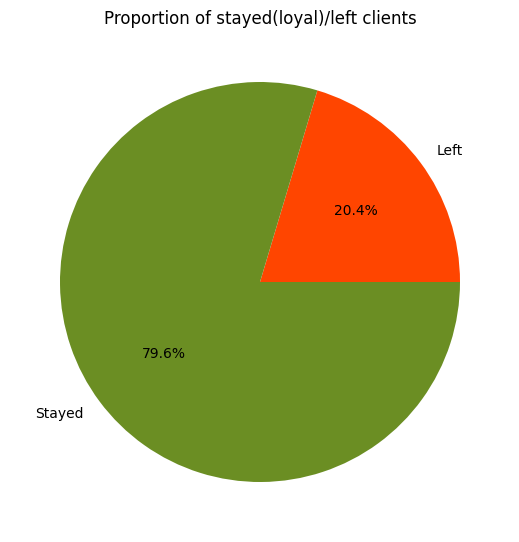

In [61]:
clients_proportion = churn_data.groupby('ExitedStatus')['CustomerId'].count()

fig = plt.figure(figsize= (10,5))
axes = fig.add_axes([0, 0, 1, 1])
my_pal = {"Left": "darkorange", "Stayed": "dodgerblue"}
axes.pie(
    clients_proportion,
    labels=['Left', 'Stayed'],
    autopct='%.1f%%',
    explode= [0, 0],
    colors=['orangered','olivedrab']
)
axes.set_title('Proportion of stayed(loyal)/left clients');

Вывод: Подавляющее большинство клиентов (79,6%) остались лояльны банку.

______________________________________________________________________________________________________________________________________________________

9.2. Постройте график, показывающий распределение баланса пользователей,
у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

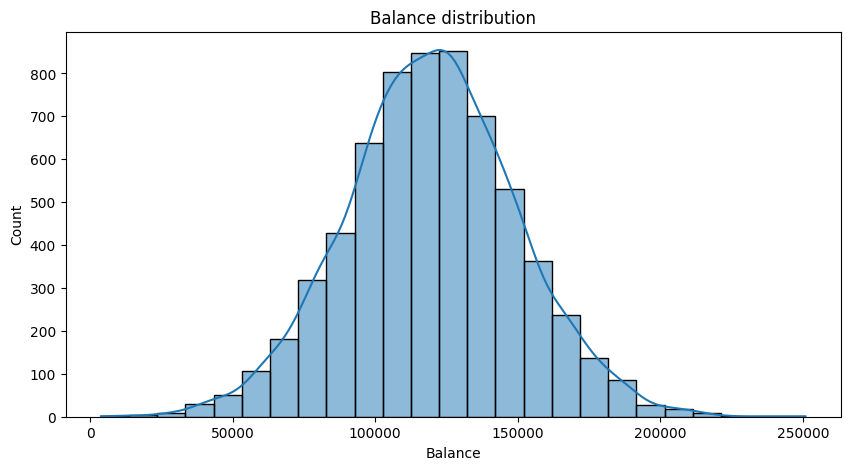

In [62]:
balance_distribution = churn_data[churn_data['Balance'] > 2500]

fig = plt.figure(figsize=(10, 5))
bal_dist_hist = sns.histplot(
    data= balance_distribution,
    x='Balance',
    bins=25,
    kde=True,
)
bal_dist_hist.set_title('Balance distribution');

Вывод: Распределение баланса денежных средств на счетах клиентов соотвествует нормальному распределению. При привлечении новых клиентов их вероятный баланс счета составит значение, лежащее в диапазоне от 100 000 до 150 000 у.д.е.

______________________________________________________________________________________________________________________________________________________

9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

In [74]:
histogeam_balance = px.histogram(
    churn_data,
    x='Balance',
    color='ExitedStatus',
    title='Distribution of clients by balance'
)

histogeam_balance.show()

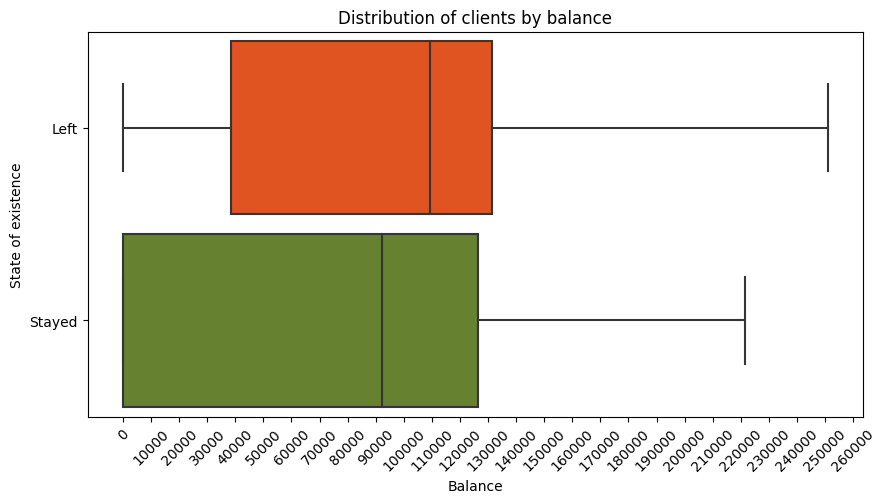

In [75]:
my_pal = {"Left": "orangered", "Stayed": "olivedrab"}


fig = plt.figure(figsize= (10, 5))
boxplot = sns.boxplot(
    data= churn_data,
    x='Balance',
    y='ExitedStatus',
    orient='h',
    width=0.9,
    palette=my_pal
)
boxplot.set_title('Distribution of clients by balance')
boxplot.set_ylabel('State of existence')
boxplot.set_xticks(range(0, 270000, 10000))
boxplot.xaxis.set_tick_params(rotation=45)


Вывод: 

Нормальное распределение обеих групп.

Выбросы отсутствуют, но есть существенное количество клиентов среди обеих групп с нулевым балансом.

Минимальное значение: одинаково для ушедших и оставшихся клиентов и равно нулю

Максимальное значение: ушедшие клиенты ~ 250 000, оставшиеся ~ 220 000

Медиана: ушедшие клиенты ~ 109 000, оставшиеся ~ 91 000. Отклонение от среднего имеется, в случае ушедших клиентов оно существенно.

Нижний квартиль: ушедшие клиенты ~ 39 000 (75% клиентов из группы ушедшие имели на балансе больше 39 000 у.д.е.), оставшиеся = 0 (совпадение с минимумом), что говорит о наличие новых клиентов и неактивных- потенциально уходящих.

Верхний квартиль: ушедшие клиенты ~ 131 000 (25% клиентов имеют на балансе больше 131 000 у.д.е.), оставшиеся ~ 128 000 (25% клиентов имеют на балансе больше 128 000 у.д.е.)

Межквартильный размах: ушедшие клиенты - более узкий диапазон, выше однородность, вероятность того, что существует определенный фактор или набор факторов влияющий на выбор клиента уйти, необходим анализ условий обслуживания счета, % по депозиту, кредитных условий. Оставшиеся клиенты - широкий диапазон, включающий минимальные значения, ниже однородность, включение большого количества новых или не активных клиентов (сумма баланса равна 0), требуется дальнейший анализ в разрезе активности счета клиента для выявления потенциально-уходящих клиентов.

Вероятность существования набора факторов влияющих на решение клиента покинуть банк. В разрезе баланса, можно сделать вывод, что существует диапазон значений баланса в котором риск вероятности ухода увеличивается, но делать выводы о потенциальном уходе без рассмотрения в разрезе других факторов не целесообразно. Может быть связано с низким % по депозиту или не выгодными условиями по ведению счета.


______________________________________________________________________________________________________________________________________________________

9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

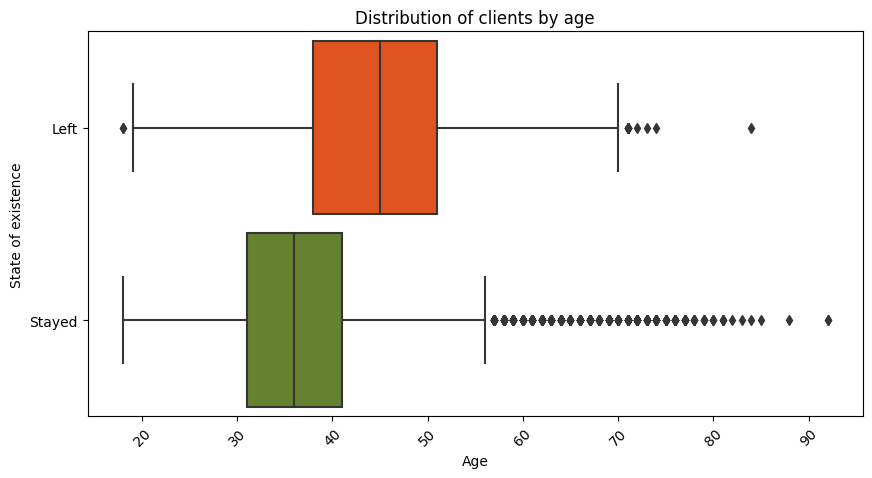

In [64]:
fig = plt.figure(figsize= (10, 5))
my_pal = {"Left": "orangered", "Stayed": "olivedrab"}
boxblot = sns.boxplot(
    data= churn_data,
    x='Age',
    y='ExitedStatus',
    orient='h',
    width=0.9,
    palette=my_pal
)
boxblot.set_title('Distribution of clients by age')
boxblot.set_ylabel('State of existence')
boxblot.xaxis.set_tick_params(rotation=45);

Вывод: 

Наибольшее количество выбросов находится в группе оставшихся клиентов, но вероятнее всего это не ошибка в данных, а реально существующие пожилые клиенты в ограниченном количестве, максимально зафиксированное значение выброса соответсвует значению ~ 92, так же наличие пожилых клиентов в группе оставшихся укладывается в стандартную консервативность данной группы населения. 

Стоит отметить, что верхний квартиль группы ушедшие со значением ~ 51 стоит рассматривать как потенциальный маркер ухода клиентов по естественным причинам, особенно учитывая наличие выбросов в группе оставшиеся.

Нижний квартиль группы оставшиеся ~ 31, ушедшие ~ 37, что может обрисовать примерную нижнюю границу целевой аудитории услуг банка.

Межквартильный размах: оставшиеся - более узкий диапазон.

Медиана: медианное значение группы оставшихся ниже чем у группы ушедшие, возможный вывод: исходя из того что что более взрослое население консервативно и имеет большую долю накоплений при меньшей финансовой нагрузке и с меньшей долей вероятности пользуется кредитными продуктами, исключая ипотеку, на вероятность ухода влияют условия обслуживания счета и/или ставка депозита, но в разрезе представленных данных это утверждение лишь догадка.

______________________________________________________________________________________________________________________________________________________

9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

In [65]:
fig = px.scatter(
    data_frame=churn_data,
    x='CreditScore',
    y='EstimatedSalary',
    title='Connection between salary and credit score',
    log_x=True,
    log_y=True,
    color='ExitedStatus',
    width=1000,
    height=700,
)
fig.show()

Вывод: Определенно существует положительная корреляция между факторами "з/п" - "кредитный рейтинг". Данный вывод можно сделать из существования аттрактора в районе пересечения (650, 200000).

______________________________________________________________________________________________________________________________________________________

9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

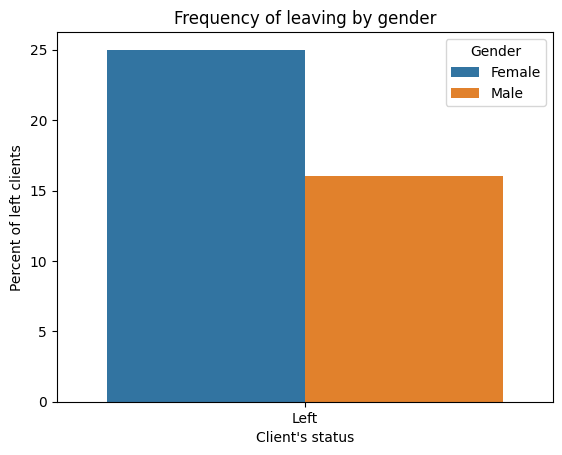

In [66]:
gender_distr = churn_data.groupby(by='Gender',as_index=False)['ExitedStatus'].value_counts(normalize=True)
gender_distr['proportion'] = round(gender_distr['proportion'] * 100)

barplot = sns.barplot(
    data=gender_distr[gender_distr['ExitedStatus']=='Left'],
    x='ExitedStatus',
    y='proportion',
    hue='Gender',
)
barplot.set_title('Frequency of leaving by gender')
barplot.set_xlabel('Client\'s status')
barplot.set_ylabel('Percent of left clients');

Вывод: Чаще уходят женьщины (25%) чем мужчины (16%).

______________________________________________________________________________________________________________________________________________________

9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

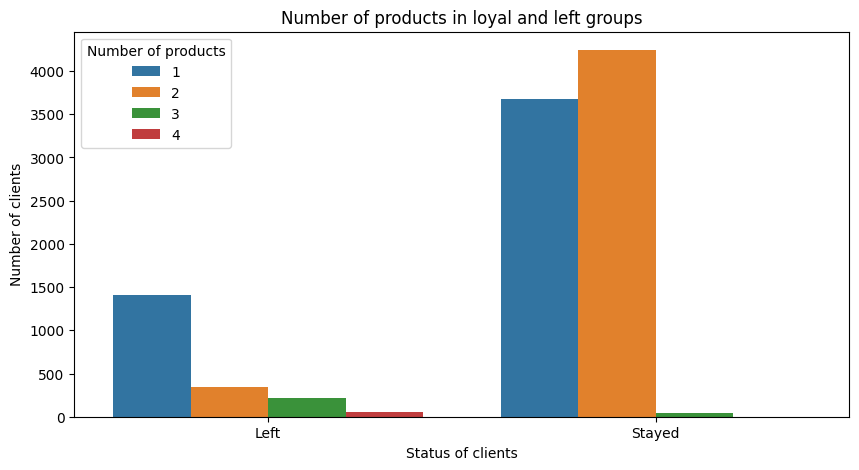

In [67]:
prod_distr = churn_data.groupby('ExitedStatus',as_index=False)['NumOfProducts'].value_counts()
fig = plt.figure(figsize= (10, 5))

barplot = sns.barplot(
    data=prod_distr,
    x='ExitedStatus',
    y='count',
    hue='NumOfProducts',
    
)
barplot.set_title('Number of products in loyal and left groups')
barplot.set_xlabel('Status of clients')
barplot.set_ylabel('Number of clients')
plt.legend(title='Number of products');

Вывод: Ушедшие клиенты по большей части пользовались только одним банковскмм продуктом, но только этот фактор не может быть сигналом к тревоге. Оставшиеся клиенты распределены между группой потребления 1 и 2 продуктов, с перевесом 2, что говорит о том, что клиент пользующийся двумя баноковскими продуктами с меньшей долей вероятности уйдет.

______________________________________________________________________________________________________________________________________________________

9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

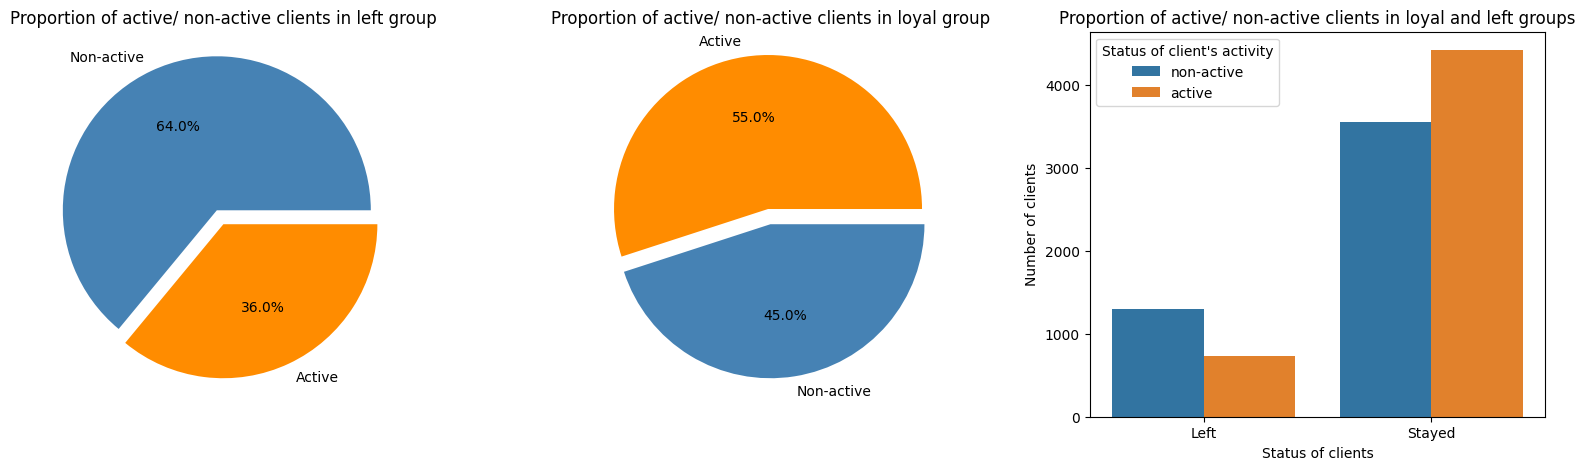

In [68]:
active_distr = churn_data.groupby('ExitedStatus',as_index=False)['IsActiveMember'].value_counts().replace({0:'non-active',1:'active'})

active_distr_perc = churn_data.groupby(
    'ExitedStatus',
    as_index=False
    )['IsActiveMember'].value_counts(normalize=True).replace({0:'non-active',1:'active'})

active_distr_perc['proportion'] = round(active_distr_perc['proportion'] * 100)
active_distr_stayed = active_distr_perc[active_distr_perc['ExitedStatus'] == 'Stayed'].drop('ExitedStatus',axis=1)
active_distr_left = active_distr_perc[active_distr_perc['ExitedStatus'] == 'Left'].drop('ExitedStatus',axis=1)


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
my_pal = {"Left": "darkorange", "Stayed": "dodgerblue"}
axes[2] = sns.barplot(
    data=active_distr,
    x='ExitedStatus',
    y='count',
    hue='IsActiveMember',
    
)
axes[2].set_title('Proportion of active/ non-active clients in loyal and left groups')
axes[2].set_xlabel('Status of clients')
axes[2].set_ylabel('Number of clients')
plt.legend(title='Status of client\'s activity')

axes[1].pie(
    data= active_distr_stayed,
    x='proportion',
    labels=['Active', 'Non-active'],
    autopct='%.1f%%',
    explode= [0.1, 0],
    colors=['darkorange','steelblue'],
)
axes[1].set_title('Proportion of active/ non-active clients in loyal group')

axes[0].pie(
    data= active_distr_left,
    x='proportion',
    labels=['Non-active', 'Active'],
    autopct='%.1f%%',
    explode= [0.1, 0],
    colors=['steelblue','darkorange'],
)
axes[0].set_title('Proportion of active/ non-active clients in left group');


Вывод: 
Большую часть ушедших клиентов составили неактивные пользователи (64%), что является маркером для внимания за неактивными пользователями (45%) группы оставшихся клиентов.

__________________________________________________________________________________________________________________________________________________________

9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

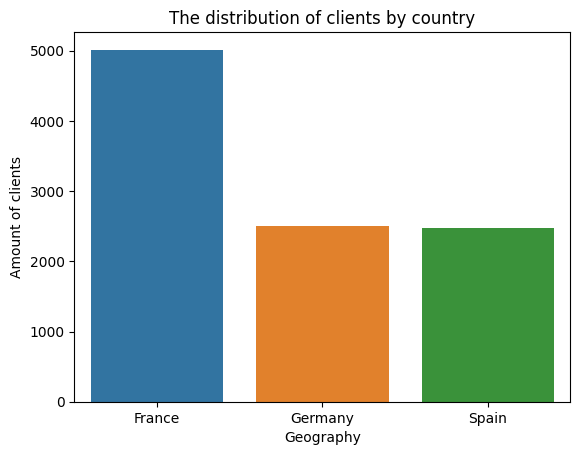

In [69]:
country_distr = churn_data.groupby(by='Geography', as_index=False)['ExitedStatus'].value_counts(normalize=True)
country_distr['proportion'] = round(country_distr['proportion'] * 100)

fig = px.choropleth(
    data_frame=country_distr[country_distr['ExitedStatus'] == 'Left'],
    locations='Geography',
    locationmode='country names',
    color='proportion',
    range_color=[0, 40],
    title='Left clients destribution by country',
    width=800,
    height=500,
    scope='europe'
)
fig.show()

country_sum = churn_data.groupby(by='Geography',as_index=False)['CustomerId'].nunique()

barplot_country = sns.barplot(
    data=country_sum,
    x='Geography',
    y='CustomerId',
)
barplot_country.set_title('The distribution of clients by country')
barplot_country.set_ylabel('Amount of clients');


Вывод:
Наибольшая доля ушедших клиентов от совокупного числа клиентов в этой стране, приходится на Германию (32%), за ней идет Испания (17%) и Франция (16%).

При этом нужно отметить, что совокупное количество клиентов распределено по странам в порядке ровно противоположном характеру оттока, иными словами ключевой страной по количеству клиентов (и ушедших и лояльных) для банка является Франция с порядка 5 000 клиентов, Германия и Испания делят второе место (~2 500 человек). 

Равная доля второстепенных для банка стран возможно говорит о применении смежного подхода в реализации единой стратегии реализации деятельности филиалов, которая плохо себя показывает в условиях Германии (больший отток).

Нужно отметить в анализе экономическую и социальную подоплеку в рассмотрение вопроса разброса в оттоке клиентов Испании и Германии (как филиальной группы* предположение),
Испания отличается более слабой экономикой и более молодым населением, что может приводить к заинтересованности в кредитных продуктах в широком объеме (как уже было сказано выше молодой клиент с количеством продуктов > 2 маловероятно покинет банк) и в меньшей степени в банковских депозитах. Что же касается Германии, то ситуация ровно противоположная. Следовательно, можно предположить, что ранее сформированные выводы касательно слабого сектора услуг по банковским депозитам верны.

________________________________________________________________________________________________________________________________________________________________________

9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

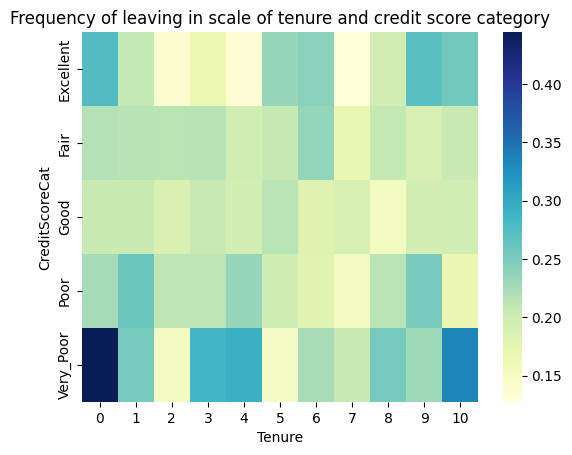

In [70]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
    
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)

churn_pivot = churn_data.pivot_table(
    values='Exited',
    columns='Tenure',
    index='CreditScoreCat',
    aggfunc='mean',
    fill_value=0
)

heatmap = sns.heatmap(data=churn_pivot, cmap='YlGnBu')
heatmap.set_title('Frequency of leaving in scale of tenure and credit score category', fontsize=12);

Вывод: 
Чаще всего уходят клиенты из группы "Very Poor" при чем стоит отметить что основными подгруппами являются как клиенты со стажем пользования 0 лет, так и 10 лет, затем идут подгруппы 3 и 4 лет.

Так же стоит отметить, что следующей группой риска по признаку кредитного рейтинга, являются клиенты группы "Excelent" со стажем 0, 9 и 10 лет.

В целом наблюдается тенденция оттока клиента из групп экстремумов: "Very poor" и "Excelent".
